In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'traffic/traffic.csv', index_col=0)

In [4]:
etth1.head()

,0
Date,
2015-01-01 00:00:00,0.0048
2015-01-01 01:00:00,0.0072
2015-01-01 02:00:00,0.0040
2015-01-01 03:00:00,0.0039
2015-01-01 04:00:00,0.0042


In [5]:
etth1.shape

(17544, 1)

<Axes: xlabel='Date'>

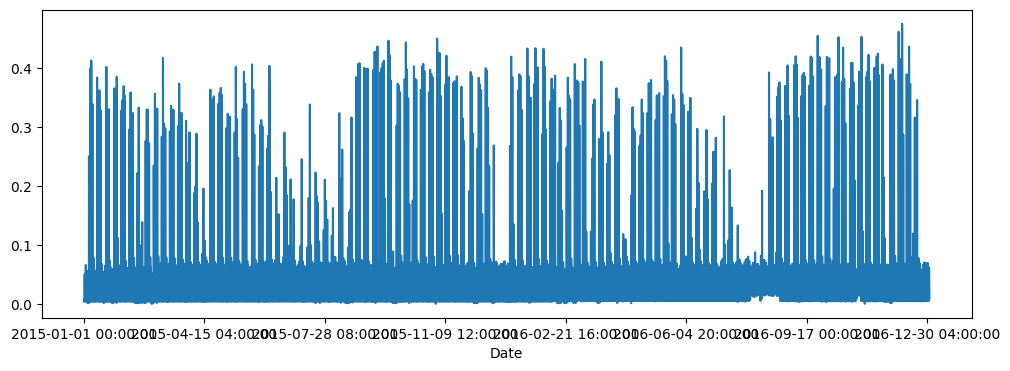

In [6]:
plt.figure(figsize=(12,4))
etth1['0'].plot()

In [7]:
scaler = MinMaxScaler()
timeseries = etth1['0']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='Date'>

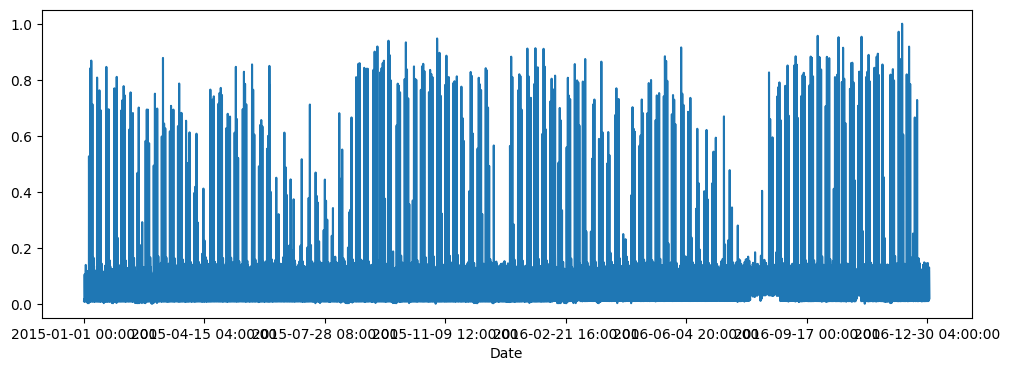

In [8]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [9]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1602861050
Epoch 2, Boundaries delta: 0.0714809471, Codewords delta: 0.0498398125
Epoch 3, Boundaries delta: 0.0472462964, Codewords delta: 0.0426949930
Epoch 4, Boundaries delta: 0.0405499660, Codewords delta: 0.0358300531
Epoch 5, Boundaries delta: 0.0337405735, Codewords delta: 0.0276814101
Epoch 6, Boundaries delta: 0.0247825057, Codewords delta: 0.0214620198
Epoch 7, Boundaries delta: 0.0196231055, Codewords delta: 0.0176054595
Epoch 8, Boundaries delta: 0.0169044658, Codewords delta: 0.0142662315
Epoch 9, Boundaries delta: 0.0135879403, Codewords delta: 0.0109332016
Epoch 10, Boundaries delta: 0.0104579872, Codewords delta: 0.0084812794
Epoch 11, Boundaries delta: 0.0085263579, Codewords delta: 0.0074899084
Epoch 12, Boundaries delta: 0.0077905140, Codewords delta: 0.0071000112
Epoch 13, Boundaries delta: 0.0074163407, Codewords delta: 0.0063752555
Epoch 14, Boundaries delta: 0.0065472969, Codewords delta: 0.0056200740
E

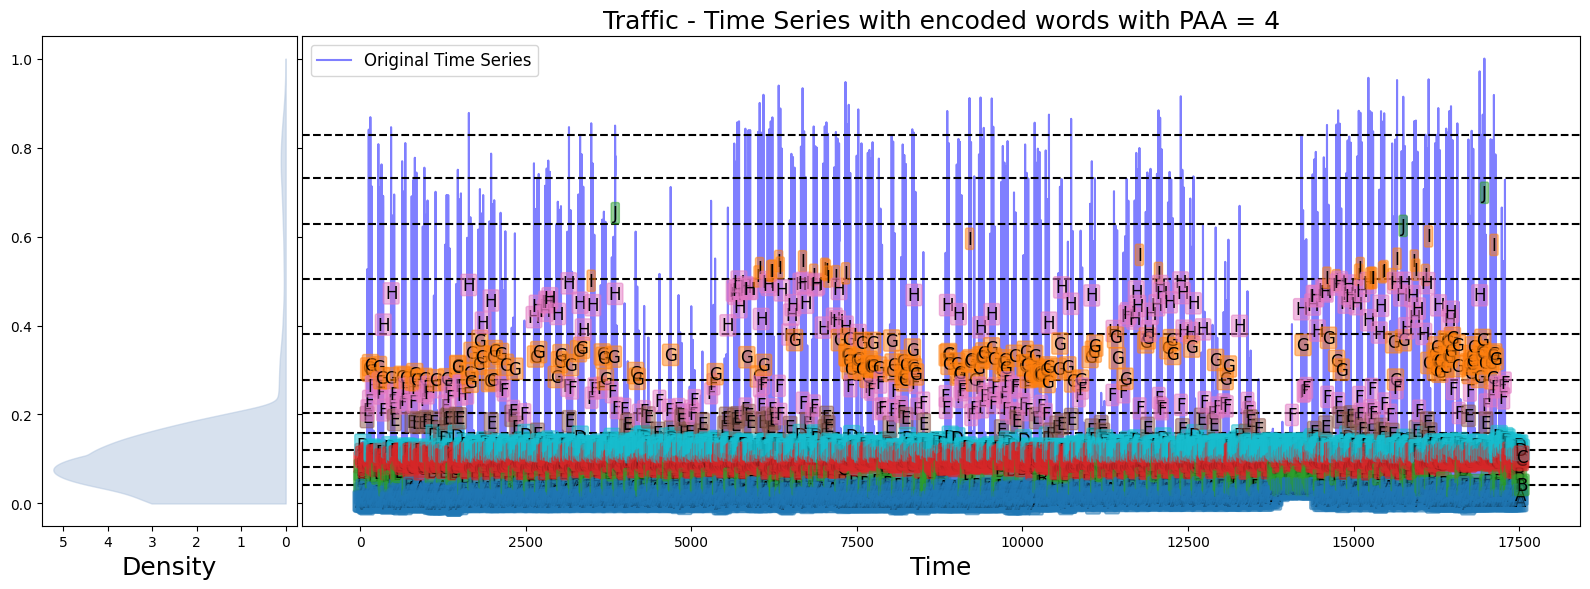

In [10]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="traffic/traffic_ksax.png", data_name='Traffic')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"traffic/traffic_ksax.csv")

### Stationary

<Axes: xlabel='Date'>

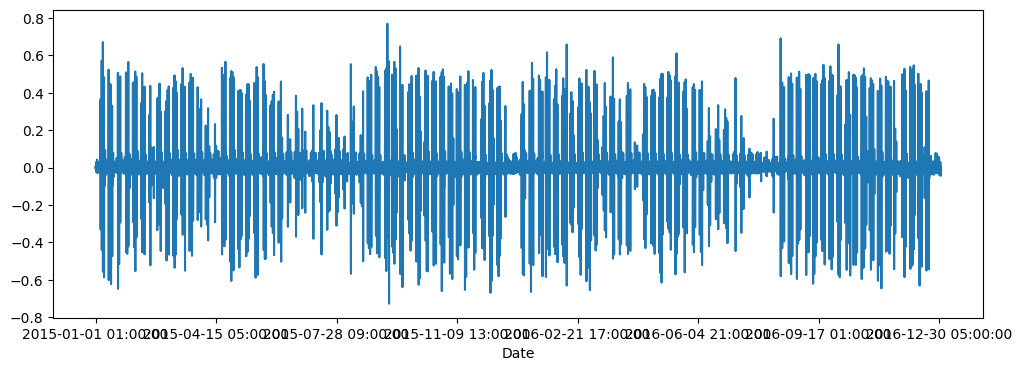

In [10]:
target = scaled_etth1
target = target.diff().dropna()
plt.figure(figsize=(12,4))
target.plot()

In [11]:
target.head()

Date
2015-01-01 01:00:00    0.005056
2015-01-01 02:00:00   -0.006741
2015-01-01 03:00:00   -0.000211
2015-01-01 04:00:00    0.000632
2015-01-01 05:00:00   -0.000421
dtype: float64

Epoch 1, Boundaries delta: 0.2857150969, Codewords delta: 0.3114042585
Epoch 2, Boundaries delta: 0.0958156427, Codewords delta: 0.0559184558
Epoch 3, Boundaries delta: 0.0575552584, Codewords delta: 0.0408392340
Epoch 4, Boundaries delta: 0.0418003084, Codewords delta: 0.0314740598
Epoch 5, Boundaries delta: 0.0307823183, Codewords delta: 0.0314575214
Epoch 6, Boundaries delta: 0.0284633768, Codewords delta: 0.0234467174
Epoch 7, Boundaries delta: 0.0201431399, Codewords delta: 0.0151835325
Epoch 8, Boundaries delta: 0.0130201440, Codewords delta: 0.0111824249
Epoch 9, Boundaries delta: 0.0096486661, Codewords delta: 0.0091960418
Epoch 10, Boundaries delta: 0.0081738825, Codewords delta: 0.0081925935
Epoch 11, Boundaries delta: 0.0072291510, Codewords delta: 0.0087724684
Epoch 12, Boundaries delta: 0.0071627311, Codewords delta: 0.0146491232
Epoch 13, Boundaries delta: 0.0100908616, Codewords delta: 0.0112013163
Epoch 14, Boundaries delta: 0.0078903057, Codewords delta: 0.0056194122
E

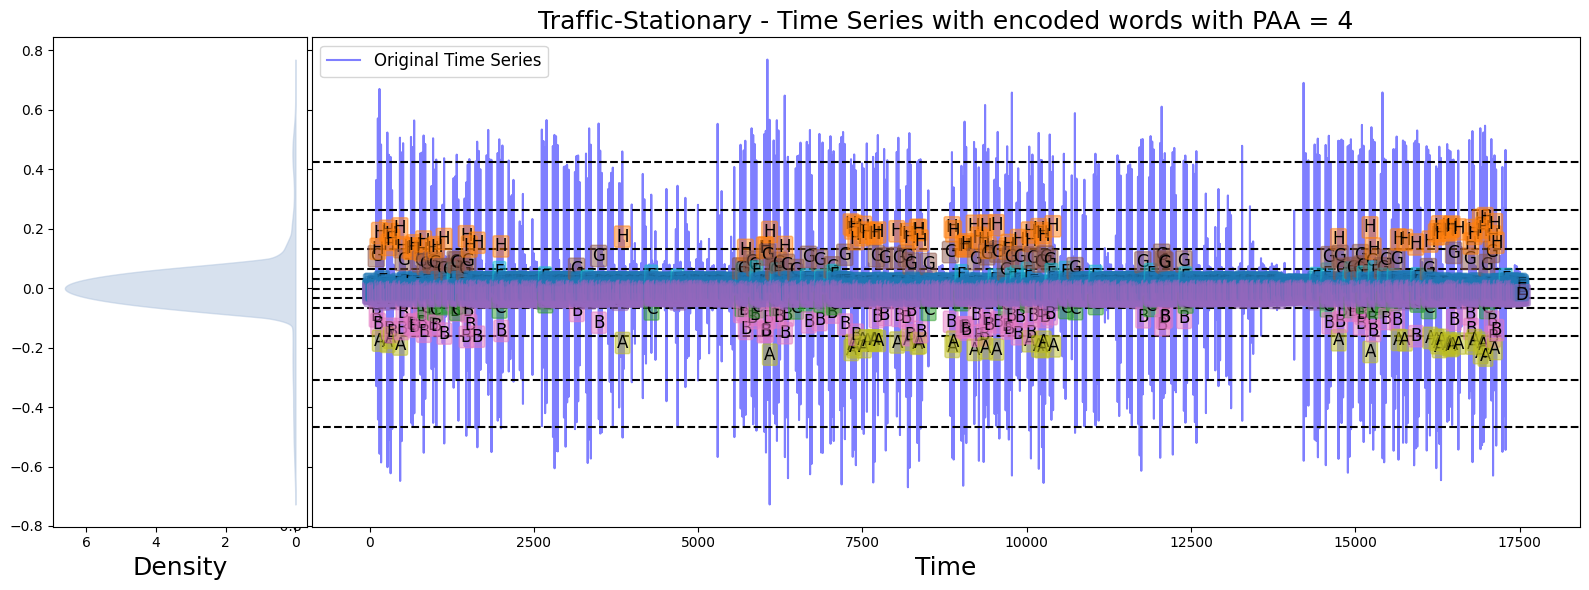

In [12]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="traffic/traffic_stationary_ksax.png", data_name='Traffic-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"traffic/traffic_stationary_ksax.csv")